In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\DERM\DERM_NE_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1.0,1.0,1,1.0,1.0,NaN,0,0.0,2.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,NaN
1,1.0,1.0,2,0.0,0.0,0.0,3,0.0,3.0,0.0,...,NaN,0.0,NaN,0.0,0.0,2.0,2.0,2.0,0.0,NaN
2,2.0,2.0,1,0.0,0.0,0.0,3,0.0,2.0,0.0,...,0.0,0.0,NaN,2.0,0.0,NaN,NaN,2.0,NaN,7.0
3,2.0,2.0,2,1.0,0.0,0.0,2,0.0,2.0,2.0,...,0.0,0.0,0.0,2.0,0.0,2.0,2.0,2.0,NaN,7.0
4,2.0,2.0,1,0.0,NaN,0.0,2,0.0,2.0,0.0,...,0.0,0.0,0.0,3.0,0.0,NaN,2.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2.0,2.0,0,2.0,1.0,NaN,0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,3.0,0.0,70.0
354,2.0,3.0,2,0.0,0.0,NaN,0,0.0,NaN,2.0,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,70.0
355,2.0,2.0,2,1.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,70.0
356,2.0,NaN,0,3.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,70.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	34
float64		column 2	34
int64		column 3	0
float64		column 4	18
float64		column 5	17
float64		column 6	35
int64		column 7	0
float64		column 8	18
float64		column 9	52
float64		column 10	51
float64		column 11	17
float64		column 12	35
float64		column 13	35
float64		column 14	52
float64		column 15	34
float64		column 16	34
float64		column 17	34
float64		column 18	17
float64		column 19	35
float64		column 20	34
float64		column 21	35
float64		column 22	17
float64		column 23	34
float64		column 24	35
float64		column 25	34
float64		column 26	35
float64		column 27	52
float64		column 28	34
float64		column 29	35
float64		column 30	69
float64		column 31	34
float64		column 32	35
float64		column 33	69
float64		column 34	69


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,324.000000,324.000000,358.000000,340.000000,341.000000,323.000000,358.000000,340.000000,306.000000,307.000000,...,324.000000,323.000000,306.000000,324.000000,323.000000,289.000000,324.000000,323.000000,289.000000,289.000000
mean,2.080247,1.799383,1.569832,1.335294,0.636364,0.461300,0.170391,0.373529,0.604575,0.485342,...,0.407407,0.427245,0.418301,0.935185,0.411765,0.076125,0.111111,1.885449,0.539792,36.425606
std,0.643889,0.672226,0.900909,1.125956,0.905716,0.965662,0.576394,0.830044,0.980387,0.879476,...,0.858796,0.832269,0.927640,1.120646,0.919484,0.345232,0.465530,0.679700,1.089394,14.769602
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,25.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,47.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,75.000000


<AxesSubplot:>

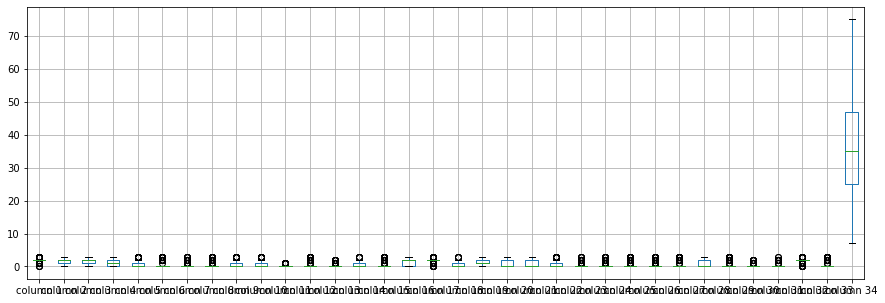

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      2.080247
column 2      1.799383
column 3      1.569832
column 4      1.335294
column 5      0.636364
column 6      0.461300
column 7      0.170391
column 8      0.373529
column 9      0.604575
column 10     0.485342
column 11     0.126100
column 12     0.362229
column 13     0.139319
column 14     0.529412
column 15     0.283951
column 16     1.342593
column 17     1.944444
column 18     0.513196
column 19     1.275542
column 20     0.666667
column 21     0.975232
column 22     0.633431
column 23     0.290123
column 24     0.359133
column 25     0.407407
column 26     0.427245
column 27     0.418301
column 28     0.935185
column 29     0.411765
column 30     0.076125
column 31     0.111111
column 32     1.885449
column 33     0.539792
column 34    36.425606
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,0.385327,0.255207,-0.040807,-0.044603,0.034320,-0.112367,-0.044608,0.126413,0.211396,...,-0.011880,0.147729,-0.105903,0.036933,-0.044739,-0.072384,-0.022380,0.075525,0.016857,-0.006271
column 2,0.385327,1.000000,0.343009,-0.058551,-0.017586,-0.039667,-0.087624,-0.052339,0.243789,0.259055,...,-0.087347,0.180235,-0.095712,0.018294,-0.055033,-0.035419,-0.020140,0.010071,-0.102570,0.002140
column 3,0.255207,0.343009,1.000000,-0.066926,0.220608,0.315252,-0.176715,0.280998,0.291546,0.245195,...,0.286715,0.336066,0.287105,-0.219806,0.248512,-0.145999,-0.108958,0.116798,0.230488,0.121769
column 4,-0.040807,-0.058551,-0.066926,1.000000,0.267800,0.411777,-0.137490,0.387851,-0.271618,-0.151246,...,0.376943,-0.216153,0.370913,-0.007773,0.355854,-0.124614,-0.176142,0.053753,0.391846,0.125578
column 5,-0.044603,-0.017586,0.220608,0.267800,1.000000,0.394031,-0.171712,0.432555,-0.076614,0.026477,...,0.425150,-0.059505,0.388816,0.014516,0.410108,-0.132300,-0.165740,0.096689,0.338440,0.082476
column 6,0.034320,-0.039667,0.315252,0.411777,0.394031,1.000000,-0.136846,0.871743,-0.298665,-0.269293,...,0.899291,-0.120255,0.898172,0.122303,0.883409,-0.100929,-0.105827,0.266389,0.900265,0.134309
column 7,-0.112367,-0.087624,-0.176715,-0.137490,-0.171712,-0.136846,1.000000,-0.132708,0.225490,-0.024826,...,-0.108972,-0.153438,-0.128013,-0.010867,-0.133852,0.769504,0.835892,-0.071680,-0.113528,-0.369441
column 8,-0.044608,-0.052339,0.280998,0.387851,0.432555,0.871743,-0.132708,1.000000,-0.274066,-0.259713,...,0.897246,-0.098447,0.877607,0.119170,0.882795,-0.058736,-0.106213,0.269199,0.879950,0.144545
column 9,0.126413,0.243789,0.291546,-0.271618,-0.076614,-0.298665,0.225490,-0.274066,1.000000,0.637896,...,-0.287281,0.466953,-0.263096,-0.414422,-0.287658,0.229273,0.255476,-0.066800,-0.273457,-0.064502
column 10,0.211396,0.259055,0.245195,-0.151246,0.026477,-0.269293,-0.024826,-0.259713,0.637896,1.000000,...,-0.258479,0.439054,-0.245069,-0.383832,-0.256950,-0.002010,-0.055048,0.011429,-0.264072,0.062310


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [34,34+29,34+29+29,34+29+29+29,34+29+29+29+29,34+29+29+29+29+29,34+29+29+29+29+29+29,34+29+29+29+29+29+29+29,34+29+29+29+29+29+29,34+29+29+29+29+29,34+29+29+29+29,34+29+29+29,34+29+29,34+29,34], vae_layer = False, seed = 29)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 64.93035333806819
Epoch: 1 , loss: 64.80117901888761
Epoch: 2 , loss: 64.58715213428844
Epoch: 3 , loss: 64.41074076565829
Epoch: 4 , loss: 64.55548928000711
Epoch: 5 , loss: 64.2079344662753
Epoch: 6 , loss: 64.0323090986772
Epoch: 7 , loss: 61.95146664706144
Epoch: 8 , loss: 59.874619397250086
Epoch: 9 , loss: 58.78382561423562
Epoch: 10 , loss: 58.14528118480336
Epoch: 11 , loss: 57.67042922973633
Epoch: 12 , loss: 57.110246831720524
Epoch: 13 , loss: 57.074905222112484
Epoch: 14 , loss: 56.93738781322133
Epoch: 15 , loss: 56.12518900090998
Epoch: 16 , loss: 56.159067674116656
Epoch: 17 , loss: 55.720267035744406
Epoch: 18 , loss: 55.6321907043457
Epoch: 19 , loss: 55.72733376242898
Epoch: 20 , loss: 55.85056773099032
Epoch: 21 , loss: 55.19750681790438
Epoch: 22 , loss: 54.75314556468617
Epoch: 23 , loss: 55.1243730024858
Epoch: 24 , loss: 54.443253777243875
Epoch: 25 , loss: 54.80956528403542
Epoc

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(358, 34)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      2.000000
column 2      1.000000
column 3      1.000000
column 4      1.000000
column 5      0.000000
column 6      0.000000
column 7      2.000000
column 8      0.000000
column 9      3.000000
column 10     2.000000
column 11     0.000000
column 12     0.000000
column 13     0.000000
column 14     1.000000
column 15     0.000000
column 16     1.000000
column 17     1.000000
column 18     1.000000
column 19     1.000000
column 20     0.682840
column 21     0.000000
column 22     0.000000
column 23     0.000000
column 24     0.000000
column 25     0.502440
column 26     0.000000
column 27     0.510768
column 28     1.123868
column 29     0.000000
column 30     0.000000
column 31     1.000000
column 32     1.000000
column 33     1.000000
column 34    12.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\DERM.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0.000000,0.000000,0,0.0,0.000000,0.622644,0,0.0,0.000000,-1.787588,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,26.800587
1,0.000000,0.000000,0,0.0,0.000000,0.000000,0,0.0,0.000000,0.000000,...,0.410407,0.000000,0.403558,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,8.718726
2,0.000000,0.000000,0,0.0,0.000000,0.000000,0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.210894,0.000000,0.0,-2.983879,-2.965490,0.000000,0.266315,0.000000
3,0.000000,0.000000,0,0.0,0.000000,0.000000,0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.255209,0.000000
4,0.000000,0.000000,0,0.0,0.260835,0.000000,0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,-2.005050,0.000000,-1.242337,0.000000,3.159896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,0.000000,0.000000,0,0.0,0.000000,0.589189,0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,-2.061757,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
354,0.000000,0.000000,0,0.0,0.000000,0.567966,0,0.0,-2.361875,0.000000,...,0.458376,0.000000,0.000000,0.000000,0.0,0.034200,0.051463,0.000000,0.000000,0.000000
355,0.000000,0.000000,0,0.0,0.000000,0.000000,0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
356,0.000000,0.689802,0,0.0,0.000000,0.000000,0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.373672,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(181.7490267916352, 758.0725558942231)

In [17]:
NRMS=numerator/denominator
NRMS


0.23975149262229112

In [18]:
new_df.iloc[66,:]

column 1      2.000000
column 2      0.000000
column 3      0.000000
column 4      3.000000
column 5      0.000000
column 6      0.000000
column 7      0.000000
column 8      0.000000
column 9      0.000000
column 10     0.000000
column 11     0.000000
column 12     0.000000
column 13     0.000000
column 14     0.542054
column 15     2.000000
column 16     2.000000
column 17     2.000000
column 18     0.000000
column 19     0.000000
column 20     0.000000
column 21     3.000000
column 22     0.409614
column 23     0.000000
column 24     0.000000
column 25     0.000000
column 26     0.000000
column 27     0.000000
column 28     0.000000
column 29     0.000000
column 30     0.020373
column 31     0.000000
column 32     2.000000
column 33     0.000000
column 34    22.000000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1.000000,1.000000,1,1.0,1.000000,0.622644,0,0.0,2.000000,0.212412,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2.000000,26.800587
1,1.000000,1.000000,2,0.0,0.000000,0.000000,3,0.0,3.000000,0.000000,...,0.410407,0.000000,0.403558,0.000000,0.0,2.000000,2.000000,2.000000,0.000000,15.718726
2,2.000000,2.000000,1,0.0,0.000000,0.000000,3,0.0,2.000000,0.000000,...,0.000000,0.000000,0.210894,2.000000,0.0,0.016121,0.034510,2.000000,0.266315,7.000000
3,2.000000,2.000000,2,1.0,0.000000,0.000000,2,0.0,2.000000,2.000000,...,0.000000,0.000000,0.000000,2.000000,0.0,2.000000,2.000000,2.000000,0.255209,7.000000
4,2.000000,2.000000,1,0.0,0.260835,0.000000,2,0.0,2.000000,0.000000,...,0.000000,0.000000,0.000000,3.000000,0.0,-0.005050,2.000000,0.757663,0.000000,10.159896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2.000000,2.000000,0,2.0,1.000000,0.589189,0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.938243,0.0,0.000000,0.000000,3.000000,0.000000,70.000000
354,2.000000,3.000000,2,0.0,0.000000,0.567966,0,0.0,0.638125,2.000000,...,0.458376,0.000000,0.000000,0.000000,0.0,0.034200,0.051463,1.000000,0.000000,70.000000
355,2.000000,2.000000,2,1.0,0.000000,0.000000,0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,0.0,0.000000,0.000000,2.000000,0.000000,70.000000
356,2.000000,1.689802,0,3.0,0.000000,0.000000,0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.373672,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,70.000000


In [20]:
imputations[-1].to_excel("DERM_NE_10(imp).xlsx", index=False, header=False)